In [114]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout , Activation
from keras.models import Sequential
from keras.regularizers import l1
pd.set_option('display.max_columns',30)

In [115]:
import os 
os.chdir("D://ML_Datasets//hackathon")
os.listdir()

['Test_dataset.xlsx',
 'Train_dataset.xlsx',
 'Variable_Description.xlsx',
 'Weights-001--103.08353.hdf5',
 'Weights-001--258.50768.hdf5',
 'Weights-001--272831.08264.hdf5',
 'Weights-001--8166209.30938.hdf5',
 'Weights-001--88.61150.hdf5',
 'Weights-001--90.38005.hdf5',
 'Weights-001--91.66642.hdf5',
 'Weights-001--92.10300.hdf5',
 'Weights-001--93.96825.hdf5',
 'Weights-001--98.12472.hdf5',
 'Weights-001--99.79396.hdf5',
 'Weights-002--62244.97625.hdf5',
 'Weights-002--852788.27596.hdf5',
 'Weights-002--87.29808.hdf5',
 'Weights-002--88.79278.hdf5',
 'Weights-002--89.57324.hdf5',
 'Weights-002--89.99886.hdf5',
 'Weights-002--92.02220.hdf5',
 'Weights-003--86.14513.hdf5',
 'Weights-003--86.44277.hdf5',
 'Weights-003--87.34077.hdf5',
 'Weights-003--88.02311.hdf5',
 'Weights-003--89.97483.hdf5',
 'Weights-004--254.33608.hdf5',
 'Weights-004--6971.51809.hdf5',
 'Weights-004--86.39584.hdf5',
 'Weights-005--251.51338.hdf5',
 'Weights-005--88.42134.hdf5',
 'Weights-006--205.87012.hdf5',
 'W

In [116]:
train=pd.read_excel("Train_dataset.xlsx",sheetname=0)
test=pd.read_excel("Test_dataset.xlsx")
display(train.describe())
display(train.info())
train=train.drop(['people_ID','Name','Designation'], axis=1)
test=test.drop(['people_ID','Name','Designation'], axis=1)

D:\anaconda\envs\tensorflow\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,people_ID,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714.000000,10403.000000,10714.000000,10714.000000,10714.000000,10714.000000,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
mean,10084.893784,1.062770,3.285888,0.523241,42.083722,9.013067,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,7108.663645,0.818222,2.721274,0.854303,15.323397,3.714970,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,1.000000,0.000000,1.000000,0.000000,16.000000,3.000000,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,2679.250000,0.000000,2.000000,0.000000,29.000000,6.000000,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,10003.500000,1.000000,2.000000,0.000000,42.000000,9.000000,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,15141.750000,2.000000,4.000000,1.000000,55.000000,12.000000,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313
max,22695.000000,2.000000,8.000000,2.000000,68.000000,15.000000,450.000000,160.000000,210.000000,350.000000,100.000000,70.000000,40.000000,7.000000,5.000000e+06,2.300000e+06,2.000000,97.632000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

None

In [117]:
def preprocessing(df):
    df['Pulmonary score'] = df['Pulmonary score'].str.replace('([<]+)', '')
    df['Children']=df.groupby("Married")['Children'].transform(lambda x: x.fillna(x.median()))
    df["Occupation"] = df["Occupation"].fillna('None')
    df["comorbidity"] = df["comorbidity"].fillna('None')
    df["cardiological pressure"].fillna(df["cardiological pressure"].mode()[0], inplace=True)
    df["FT/month"] = df.groupby(['salary',"Occupation"])["FT/month"].transform(lambda x: x.fillna(x.median()))
    df["Insurance"] = df.groupby("salary")["Insurance"].transform(lambda x: x.fillna(x.mean()))
    df["Heart rate"] = df.groupby(["Age","comorbidity"])["Heart rate"].transform(lambda x: x.fillna(x.mean()))
    df["Diuresis"] = df.groupby(["Gender","comorbidity"])["Diuresis"].transform(lambda x: x.fillna(x.mean()))
    df["Platelets"] = df.groupby(["Age","comorbidity"])["Platelets"].transform(lambda x: x.fillna(x.mean()))
    df["HBB"] = df.groupby(["Age","Gender"])["HBB"].transform(lambda x: x.fillna(x.mean()))
    df["d-dimer"] = df.groupby(["Gender","comorbidity"])["d-dimer"].transform(lambda x: x.fillna(x.mean()))
    df["HDL cholesterol"] = df.groupby(["Gender","comorbidity"])["HDL cholesterol"].transform(lambda x: x.fillna(x.mean()))
    return df

In [118]:
train=preprocessing(train)
test=preprocessing(test)

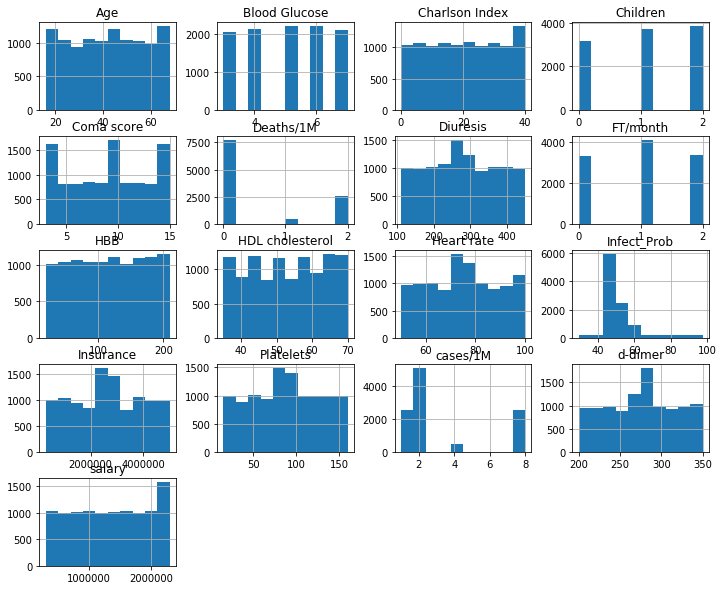

In [119]:
train.hist(figsize=(12,10))
plt.show()

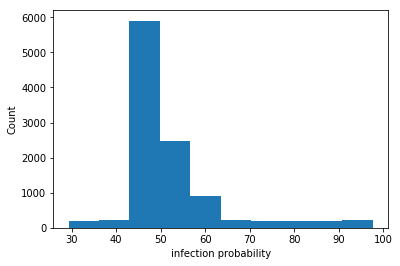

In [120]:
plt.hist(train['Infect_Prob'])
plt.xlabel('infection probability')
plt.ylabel('Count')
plt.show()

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 25 columns):
Region                    10714 non-null object
Gender                    10714 non-null object
Married                   10714 non-null object
Children                  10714 non-null float64
Occupation                10714 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10714 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10714 non-null object
Diuresis                  10714 non-null float64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
Heart rate                10714 non-null float64
HDL cholesterol          

In [122]:
newoccu=train.groupby('Occupation')
newregion=train.groupby('Region')
occumean=(newoccu['Infect_Prob'].mean())
regmean=newregion['Infect_Prob'].mean()
print(occumean)
print(regmean)

Occupation
Business         51.859683
Cleaner          51.740274
Clerk            52.058502
Driver           52.157709
Farmer           50.758001
Legal            51.618829
Manufacturing    51.716016
None             58.431488
Researcher       52.172316
Sales            52.320812
Name: Infect_Prob, dtype: float64
Region
Bengaluru       55.444277
Bhubaneshwar    50.991207
Chandigarh      51.359873
Chennai         50.992465
Delhi           54.055407
Name: Infect_Prob, dtype: float64


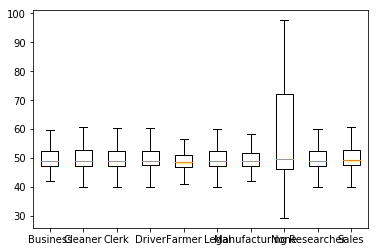

In [123]:
labelsoc=[]
box_values=[]
for name,group in newoccu:
    labelsoc.append(name)
    box_values.append(group['Infect_Prob'].values)
plt.boxplot(box_values,0, '',labels=labelsoc)
plt.show()

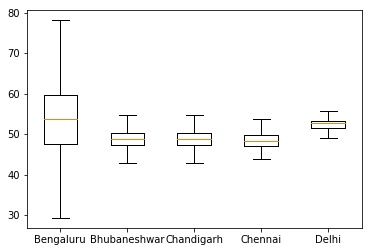

In [124]:
labelsre=[]
box_val=[]
for name,group in newregion:
    labelsre.append(name)
    box_val.append(group['Infect_Prob'].values)
plt.boxplot(box_val,0,'',labels=labelsre)
plt.show()

In [125]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)
train.info()
test.info()
display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 51 columns):
Children                              10714 non-null float64
cases/1M                              10714 non-null int64
Deaths/1M                             10714 non-null int64
Age                                   10714 non-null int64
Coma score                            10714 non-null int64
Diuresis                              10714 non-null float64
Platelets                             10714 non-null float64
HBB                                   10714 non-null float64
d-dimer                               10714 non-null float64
Heart rate                            10714 non-null float64
HDL cholesterol                       10714 non-null float64
Charlson Index                        10714 non-null int64
Blood Glucose                         10714 non-null int64
Insurance                             10714 non-null float64
salary                                10714 non-n

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,...,Mode_transport_Car,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,Pulmonary score_100,Pulmonary score_200,Pulmonary score_300,Pulmonary score_400,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,1.0,2,0,68,8,441.000000,154.000000,93.0,233.000000,82.000000,58.0,27,7,3.600000e+06,1300000,...,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1,2.0,2,0,64,15,276.739837,121.000000,56.0,328.000000,89.000000,68.0,5,6,1.600000e+06,400000,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
2,1.0,2,0,19,13,416.000000,124.000000,137.0,213.000000,77.000000,43.0,40,6,3.400000e+06,900000,...,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,1.0,2,0,33,9,410.000000,98.000000,167.0,275.000000,64.000000,60.0,27,7,7.000000e+05,2300000,...,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,2.0,2,0,23,7,390.000000,21.000000,153.0,331.000000,71.000000,64.0,32,7,3.200000e+06,1100000,...,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0
5,1.0,2,0,35,9,389.000000,139.000000,86.0,216.000000,94.000000,38.0,5,5,4.600000e+06,1900000,...,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1
6,2.0,2,0,61,3,277.955409,75.000000,156.0,311.000000,99.000000,68.0,23,5,4.000000e+06,1600000,...,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
7,1.0,2,0,49,10,194.000000,123.000000,179.0,242.000000,82.000000,59.0,34,3,4.100000e+06,1200000,...,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
8,2.0,2,0,44,6,310.000000,98.562500,156.0,276.051282,70.062500,37.0,21,7,4.500000e+06,900000,...,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
9,1.0,2,0,41,14,242.000000,23.000000,178.0,277.000000,83.000000,58.0,28,4,2.200000e+06,1400000,...,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0


In [126]:
from sklearn.linear_model import ElasticNet, Lasso,  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [127]:
X=train.drop('Infect_Prob' , axis=1)
y_train=train['Infect_Prob']
X = StandardScaler().fit(X).transform(X)
testn=StandardScaler().fit(test).transform(test)
x_train, x_test, Y_train, Y_test = train_test_split(X,y_train, test_size=0.2, random_state =42)

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [128]:
RF = RandomForestRegressor(random_state=0)
RF.fit(x_train, Y_train)
y_RF  = RF.predict(x_test)
score_LR = mean_squared_error(Y_test,yhat_LR)
r2_LR = r2_score(Y_test,yhat_LR)
print(score_LR)
print(r2_LR)

D:\anaconda\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


80.47029399964575
0.2938544184832398


In [129]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128,input_dim = x_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.2))

# The Hidden Layers :
NN_model.add(Dense(256,activation='relu'))
NN_model.add(Dense(256,activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_97 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 257       
Total params: 105,601
Trainable params: 105,601
Non-trainable params: 0
_________________________________________________________________


In [130]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
hist = NN_model.fit(x_train, Y_train, validation_data = (x_test, Y_test), epochs=20 ,callbacks=callbacks_list)


Train on 8571 samples, validate on 2143 samples
Epoch 1/20
8571/8571 [==============================] - 3s 375us/step - loss: 247.6495 - mean_squared_error: 247.6495 - val_loss: 90.9027 - val_mean_squared_error: 90.9027

Epoch 00001: val_loss improved from inf to 90.90268, saving model to Weights-001--90.90268.hdf5
Epoch 2/20
8571/8571 [==============================] - 1s 141us/step - loss: 101.6202 - mean_squared_error: 101.6202 - val_loss: 85.8689 - val_mean_squared_error: 85.8689

Epoch 00002: val_loss improved from 90.90268 to 85.86889, saving model to Weights-002--85.86889.hdf5
Epoch 3/20
8571/8571 [==============================] - 1s 143us/step - loss: 94.3908 - mean_squared_error: 94.3908 - val_loss: 95.9531 - val_mean_squared_error: 95.9531

Epoch 00003: val_loss did not improve from 85.86889
Epoch 4/20
8571/8571 [==============================] - 1s 146us/step - loss: 91.6039 - mean_squared_error: 91.6039 - val_loss: 88.5273 - val_mean_squared_error: 88.5273

Epoch 00004: va

KeyboardInterrupt: 

In [131]:
weights_file = 'Weights-006--85.33243.hdf5'
NN_model.load_weights(weights_file)
y_nn = NN_model.predict(x_test)
print(mean_squared_error(Y_test, y_nn))

85.3324349336226


In [132]:
lasso = Lasso()
lasso.fit(x_train, Y_train)
y_lasso = lasso.predict(x_test)
score_lasso = mean_squared_error(Y_test,y_lasso)
print(score_lasso)

86.07167979975426


In [136]:
display(testn)
test_pred= NN_model.predict(test)
test["Infect_prob"]=test_pred
print(test)

array([[ 1.25773692, -0.40561468, -0.35943907, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [ 1.25773692, -0.40561468, -0.35943907, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [ 1.25773692, -0.40561468, -0.35943907, ..., -0.5811202 ,
        -0.58441243,  1.75775533],
       ...,
       [-1.20590827,  1.09925523,  0.68929259, ..., -0.5811202 ,
        -0.58441243, -0.56890739],
       [-1.20590827,  1.09925523,  0.68929259, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [-1.20590827,  1.09925523,  0.68929259, ..., -0.5811202 ,
         1.71112034, -0.56890739]])

       Children  cases/1M  Deaths/1M  Age  Coma score  Diuresis  Platelets  \
0             2         4          1   52           3       388        153   
1             2         4          1   53          11       409         95   
2             2         4          1   35           9       440         40   
3             2         4          1   31          12       206         78   
4             2         4          1   51           6       229        109   
5             2         4          1   34          14       340         35   
6             2         4          1   61           7       176         82   
7             2         4          1   55           7       287        117   
8             2         4          1   28           9       373         89   
9             2         4          1   55          15       442         57   
10            2         4          1   65           4       382         79   
11            2         4          1   66          10       378 

In [137]:
test.to_csv("Prediction.csv")